# Visualization gallery

The visualization methods implemented in PEtab Select are demonstrated here. These methods generally visualize the output of a model selection task, so the input is generally a list of already-calibrated models.

Here, some calibrated models that were saved to disk with `petab_select.model.models_to_yaml_list` are loaded and used as input. This is the result of a forward selection with the problem provided in `calibrated_models`.

In [1]:
import petab_select

models = petab_select.models_from_yaml_list(
    model_list_yaml="calibrated_models/calibrated_models.yaml"
)

We customize the labels here to just be the second part of a model hash: a binary string that describes their estimated parameters. We additionally set a custom color for a couple of models, and the default color for the other models. We also set a nicer label for the "virtual initial model", which is a hypothetical model that PEtab Select uses by default to initialize a forward search (with no parameters).

In [2]:
# Custom labels
labels = {}
for model in models:
    labels[model.get_hash()] = "M_" + "".join(
        "1" if value == petab_select.ESTIMATE else "0"
        for value in model.parameters.values()
    )
labels[petab_select.ModelHash(petab_select.VIRTUAL_INITIAL_MODEL, "")] = (
    "\n".join(petab_select.VIRTUAL_INITIAL_MODEL.split("_")).title()
)

# Custom colors for some models
colors = {
    "M_000": "lightgreen",
    "M_001": "lightgreen",
}

# Change default color
petab_select.plot.NORMAL_NODE_COLOR = "darkgray"

## UpSet plot

This shows models ordered by criterion, with their parameters directly below the bars.

A black dot indicates that the parameter (e.g `k2`) is estimated in the model (e.g. the first bar is a model with `k1` and `sigma_x2` estimated).

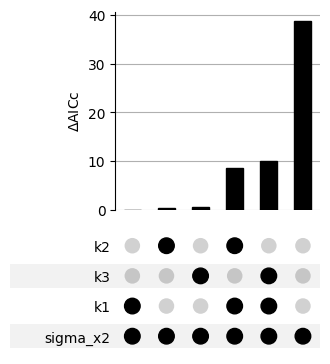

In [3]:
petab_select.plot.upset(models=models, criterion=petab_select.Criterion.AICC);

## Selected models

This shows strict improvements in the criterion, and the corresponding model, across all iterations of model selection.

Since there were no improvements after `M_100`, no other iterations or models are shown.

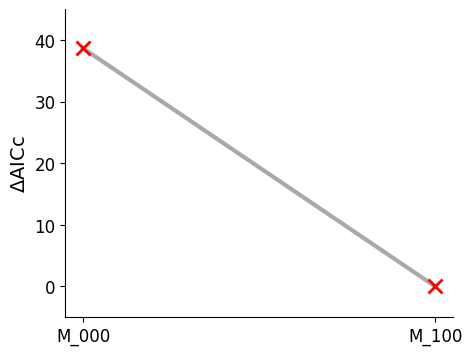

In [4]:
petab_select.plot.line_selected(
    models=models,
    criterion=petab_select.Criterion.AICC,
    labels=labels,
);

## Selection history trajectory

This shows the relationship between models across iterations. For example, `M_000` was the predecessor model to `M_001`, `M_010`, and `M_100`.

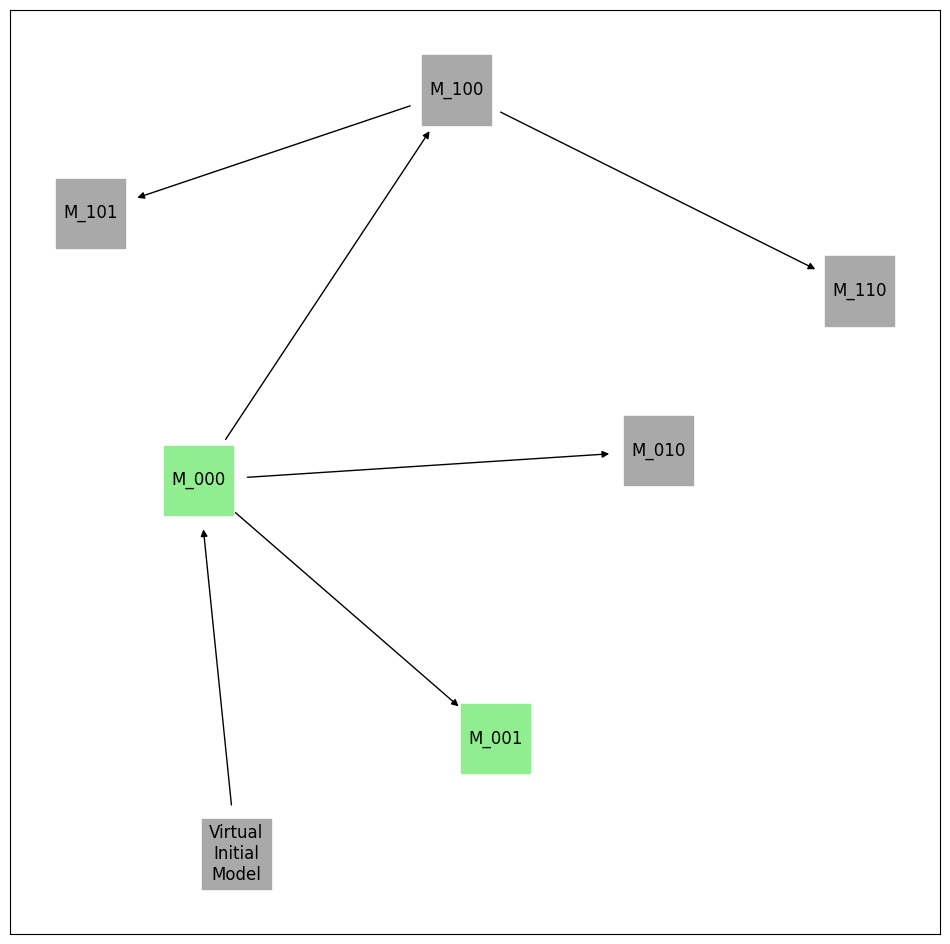

In [5]:
petab_select.plot.graph_history(
    models=models,
    criterion=petab_select.Criterion.AICC,
    labels=labels,
    colors=colors,
);

## Criterion values of each model

This shows the criterion value of every calibrated model.

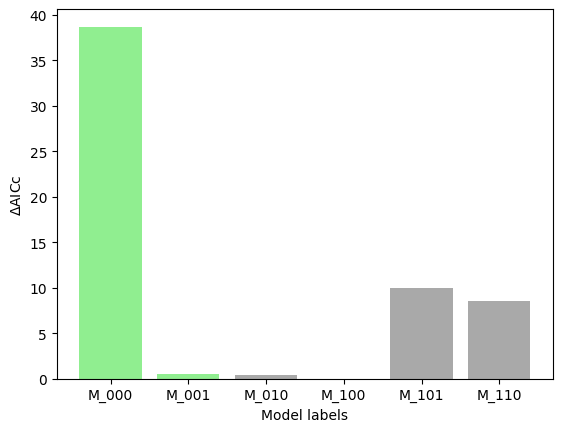

In [6]:
petab_select.plot.bar_criterion_vs_models(
    models=models,
    criterion=petab_select.Criterion.AICC,
    labels=labels,
    colors=colors,
);

## Criterion values vs. number of estimated parameters

This shows all calibrated models.

In this example, models with 2 estimated parameters tend to perform best. This is also seen in the UpSet plot above.

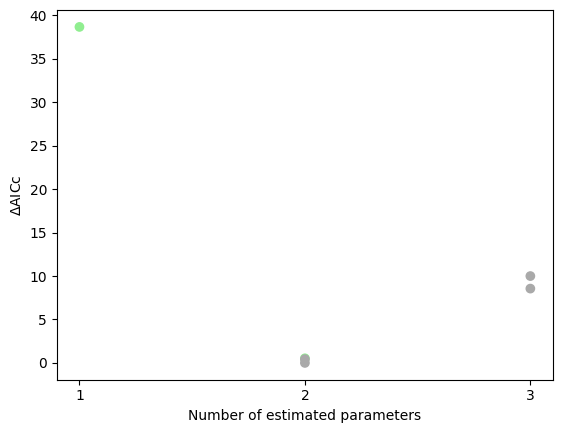

In [7]:
petab_select.plot.scatter_criterion_vs_n_estimated(
    models=models,
    criterion=petab_select.Criterion.AICC,
    labels=labels,
    colors=colors,
);

## History as layers in a hierarchical graph

This shows the relative change in parameters of each model, compared to its predecessor model.

N.B.: this may give a misleading impression of the models calibrated in each iteration, since it's only based on "predecessor model" relationships. In this example, each layer is indeed an iteration.

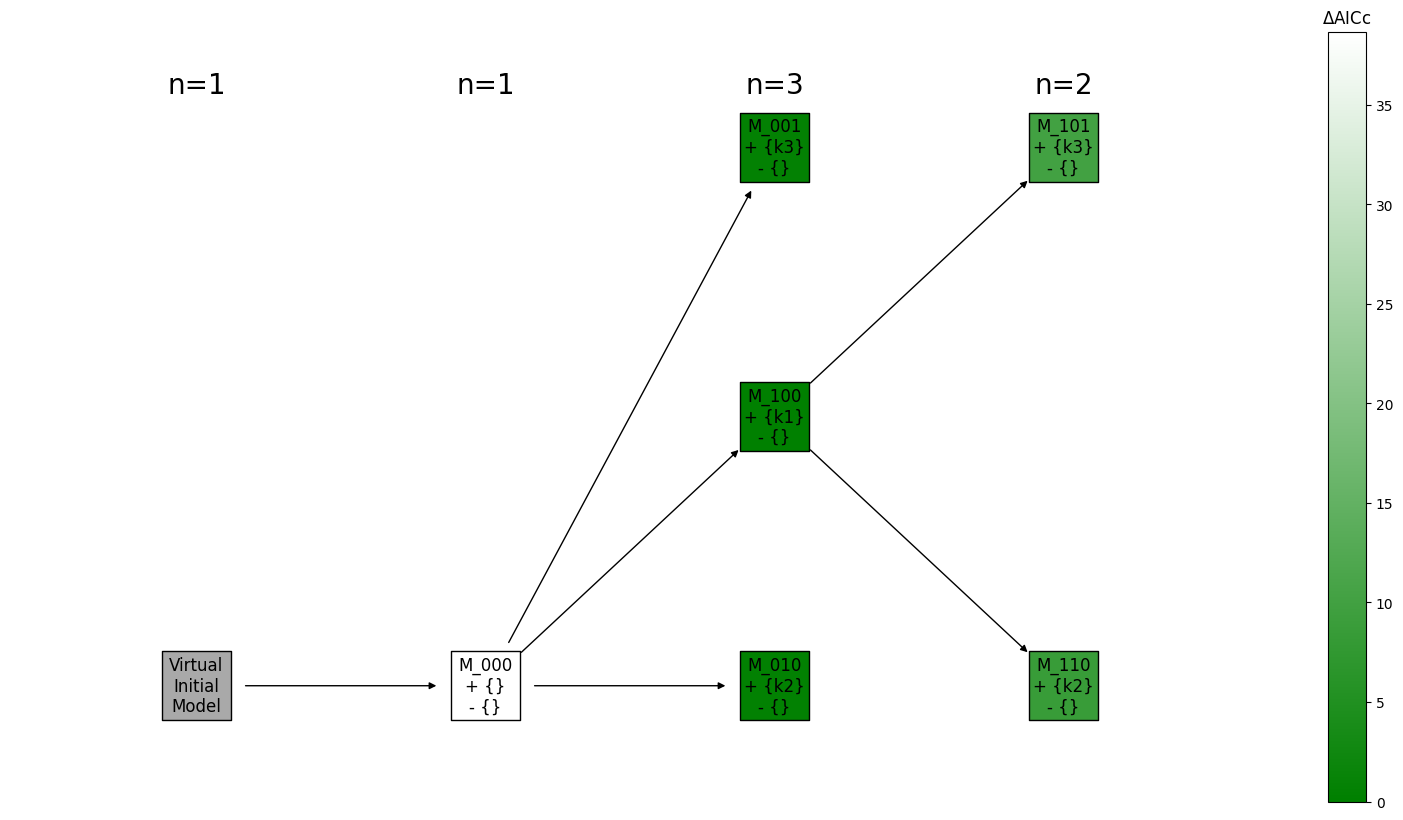

In [8]:
# # Customize the colors
# criterion_values = [model.get_criterion(petab_select.Criterion.AICC) for model in models]
# norm = matplotlib.colors.Normalize(
#     vmin=min(criterion_values),
#     vmax=max(criterion_values),
# )
# cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["green","lightgreen"])
# colorbar_mappable = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

petab_select.plot.graph_iteration_layers(
    models=models,
    criterion=petab_select.Criterion.AICC,
    labels=labels,
    draw_networkx_kwargs={
        "arrowstyle": "-|>",
        "node_shape": "s",
        "node_size": 2500,
        "edgecolors": "k",
    },
    # colorbar_mappable=colorbar_mappable,
);